In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
%matplotlib inline

Data Analysis

In [2]:
quiss = pd.read_csv('quis.csv')
res = pd.read_csv('res.csv')
not_res = quiss.loc[quiss['OWC'] < 1]

In [3]:
sw_quis = quiss['SW']
phie_quis = quiss['phie']
sw_res = res['SW']
phie_res = res['phie']
phie_not_res = not_res['phie']
sw_not_res = not_res['SW']

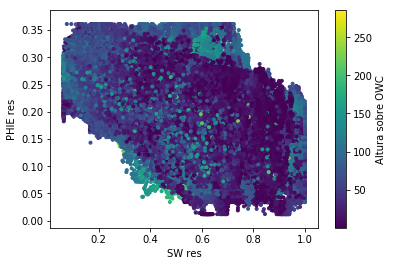

In [4]:
plt.scatter(sw_res,phie_res,c=res['OWC'],marker=".")
plt.xlabel('SW res')
plt.ylabel('PHIE res')
plt.colorbar(label='Altura sobre OWC')
plt.show()

Elbow Method

In [5]:
from sklearn.cluster import *
from sklearn import preprocessing

In [6]:
x=sw_res
y=phie_res
xp = (preprocessing.scale(x))
yp = (preprocessing.scale(y))

In [8]:
temp_data=pd.DataFrame()
temp_data['X']=xp
temp_data['Y']=yp
wcss=[]
rang=range(1,10)
for k in tqdm(rang):
    kmeans = KMeans(k,init='k-means++')
    kmeans.fit(temp_data)
    wcss.append(kmeans.inertia_)

In [9]:
ds=[0]
for i in range(1,len(wcss)-1):
    d1=wcss[i-1]-wcss[i]
    d2=wcss[i]-wcss[i+1]
    ds.append(d1-d2)
ds.append(0)

Text(0, 0.5, 'WCSS')

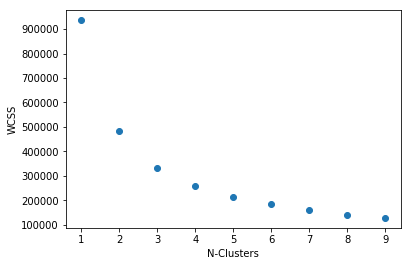

In [10]:
plt.scatter(rang,wcss)
plt.xlabel('N-Clusters')
plt.ylabel('WCSS')

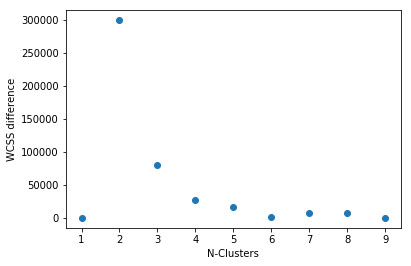

In [11]:
plt.scatter(rang,ds)
plt.xlabel('N-Clusters')
plt.ylabel('WCSS difference')
plt.show()

In [12]:
kmeans = KMeans(4,init='k-means++')
new_data = res.copy()
new_data['Cluster']=kmeans.fit_predict(temp_data)
clusters=new_data['Cluster']

In [13]:
li_cluster=new_data['Cluster'].tolist()
n_li=[]
for i in li_cluster:
    if i == 3:
        n_li.append(0)
    elif i == 0:
        n_li.append(3)
    else:
        n_li.append(i)
new_data['Cluster'] = pd.Series(n_li)

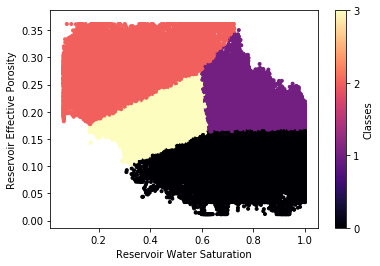

In [14]:
plt.scatter(x,y,c=n_li,marker='.',cmap='magma')
plt.xlabel('Reservoir Water Saturation')
plt.ylabel('Reservoir Effective Porosity')
plt.colorbar(ticks=[0,1,2,3],spacing='uniform',label='Classes')
plt.show()

Text(0.5, 0, 'J célula - Inlines')

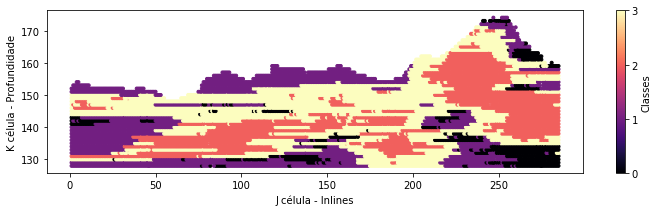

In [15]:
j_slice=int((np.max(new_data['j']))/2)
j_slice_data=new_data.loc[new_data['j'] == j_slice]
xplot = j_slice_data['i']
yplot = j_slice_data['k']
plt.figure(figsize=(12,3))
plt.scatter(xplot,yplot,c=j_slice_data['Cluster'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3],spacing='uniform',label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('J célula - Inlines')

Text(0.5, 0, 'I célula - Crosslines')

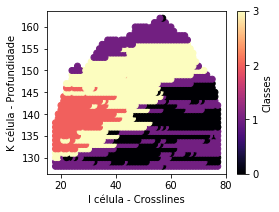

In [16]:
i_slice=int((np.max(new_data['i']))/2)
i_slice_data=new_data.loc[new_data['i'] == i_slice]
xplot = i_slice_data['j']
yplot = i_slice_data['k']
plt.figure(figsize=(4,3))
plt.scatter(xplot,yplot,c=i_slice_data['Cluster'],cmap='magma')
plt.colorbar(ticks=[0,1,2,3],label='Classes')
plt.ylabel('K célula - Profundidade')
plt.xlabel('I célula - Crosslines')

Text(0.5, 0, 'Longitude')

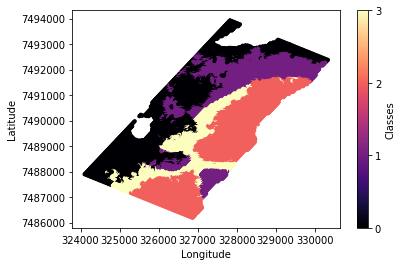

In [17]:
k_slice=int((np.median(new_data['k']))/1)
k_slice_data=new_data.loc[new_data['k'] == k_slice]
xplot = k_slice_data['X']
yplot = k_slice_data['Y']
plt.scatter(xplot,yplot,c=k_slice_data['Cluster'],marker='.',cmap='magma')
plt.colorbar(ticks=[0,1,2,3],spacing='uniform',label='Classes')
plt.ylabel('Latitude')
plt.xlabel('Longitude')

In [18]:
new_data.to_csv('cluster.csv')